In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

In [3]:
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('luxury_watches_with_features.csv', index_col=0)
display(data)

,watch_name,type_gender,brand,watch_color,watch_size,length_of_band,price,diamonds,ref_num,name_length,brand_len,col_len
0,Rolex Datejust Combination Watch,M,rolex,yellow combination,18.0,36.0,7500.0,0,16233,33,5,18
1,Cartier Benoit Gold Watch,F,cartier,grey,16.0,28.0,7900.0,0,missing,25,7,4
2,Rolex Milgauss Steel Watch,M,rolex,steel,17.0,40.0,9000.0,0,116400GV,27,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3165,Prada Gold Plated Watch,U,prada,brown,18.0,24.0,580.0,0,missing,23,5,5
3166,Chanel Premier Steel Watch,F,chanel,steel,17.0,18.5,1950.0,0,missing,26,6,5
3167,Cartier Rotonde Gold Watch,M,cartier,brown,19.0,42.0,25500.0,0,W1556203,27,7,5


# 1.

Some descriptive figures regarding the dataset as a whole.

In [5]:
display(len(data))

3168

In [6]:
display(len(data.columns))

12

## 1.1

In [7]:
data['watch_name'].nunique()

1111

In [8]:
a = pd.DataFrame(data['watch_name'].value_counts()).sort_values('watch_name', ascending=False)
a['name'] = a.index
a = a.reset_index(drop=True)
a.columns = ['count', 'name']
display(a)

,count,name
0,107,Rolex Combi Diamond Watch
1,74,Gucci Steel Watch
2,65,Rolex Steel Watch
...,...,...
1108,1,Hermes Kelly 2 Diamond Watch
1109,1,IWC Pilot Spitfire Chrono Steel Watch
1110,1,Cartier Rotonde Gold Watch


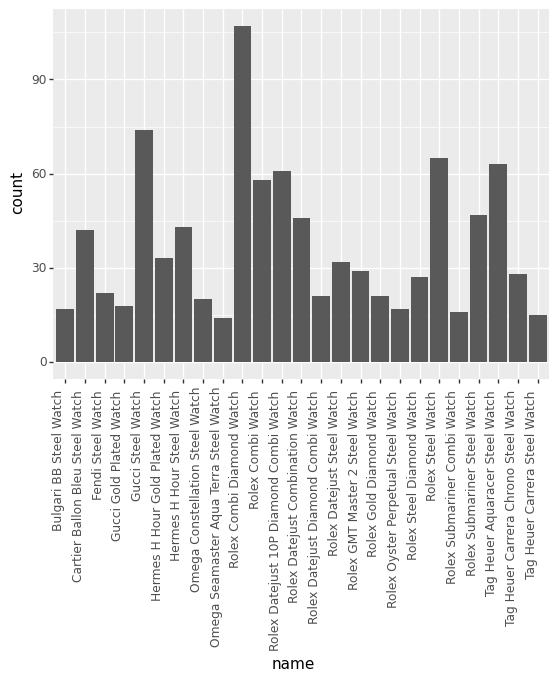

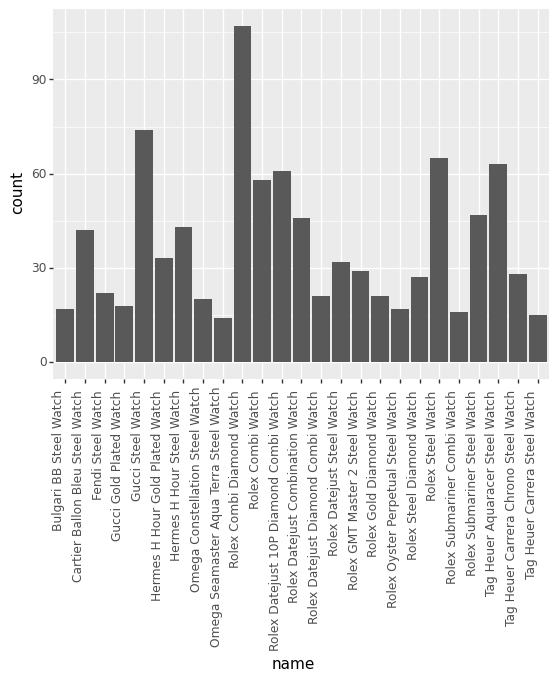

In [9]:
display((
    ggplot(a.iloc[0:25, :]) +
    geom_col(aes(x = a.iloc[0:25, :]['name'], y = a.iloc[0:25, :]['count'])) +
    theme(axis_text_x=element_text(rotation=90, hjust=1))
).draw())

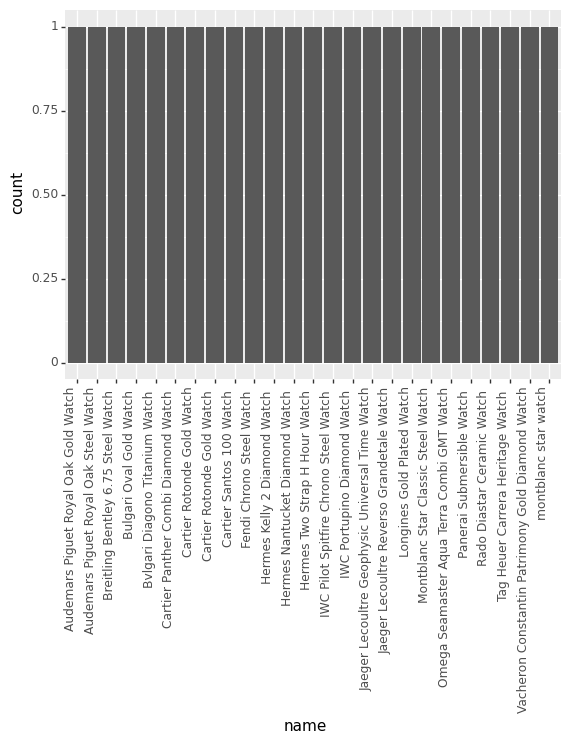

In [10]:
display((
    ggplot(a.iloc[-25:, :]) +
    geom_col(aes(x = a.iloc[-25:, :]['name'], y = a.iloc[-25:, :]['count'])) +
    theme(axis_text_x=element_text(rotation=90, hjust=1))
).draw())

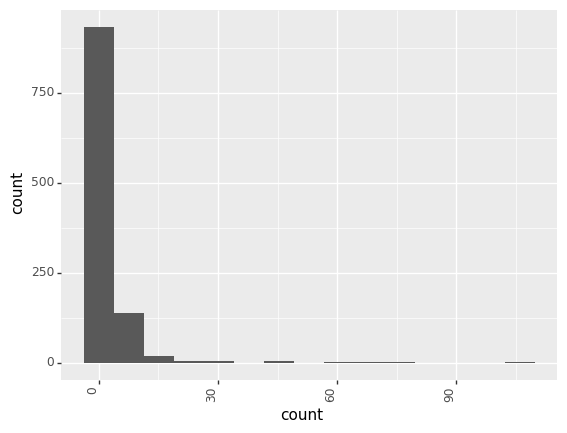

In [11]:
display((
    ggplot(a) +
    geom_histogram(aes(x = 'count'), bins = 15) +
    theme(axis_text_x=element_text(rotation=90, hjust=1))
).draw())

In [12]:
pd.set_option('display.max_rows', None)
display(a['count'].describe())
pd.set_option('display.max_rows', 7)

count    1111.000000
mean        2.851485
std         6.616285
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       107.000000
Name: count, dtype: float64

In [13]:
pd.set_option('display.max_rows', None)
print(data['watch_name'].describe())
pd.set_option('display.max_rows', 7)

count                           3168
unique                          1111
top       Rolex Combi Diamond Watch 
freq                             107
Name: watch_name, dtype: object


## 1.2

In [14]:
print(data['type_gender'].value_counts())

F    1499
M    1486
U     183
Name: type_gender, dtype: int64


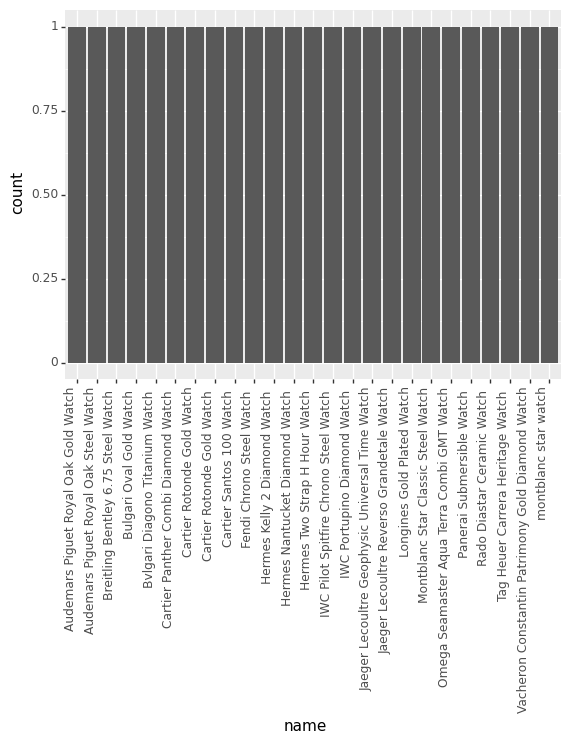

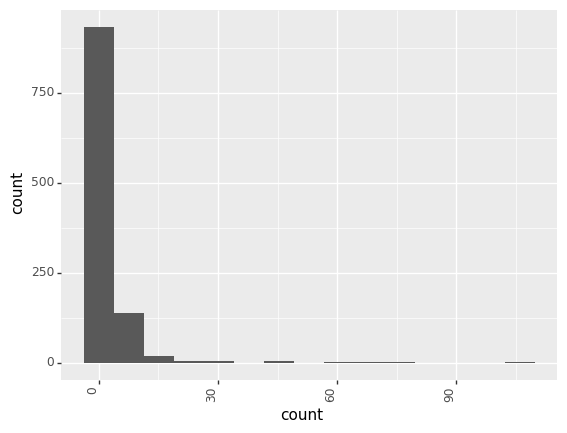

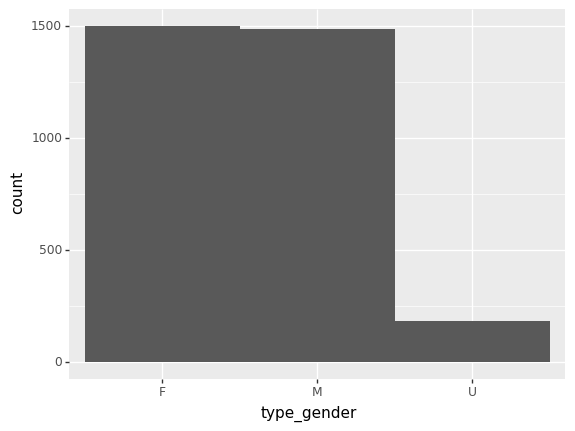

In [15]:
print(
    ggplot(pd.DataFrame(data['type_gender'])) +
    geom_histogram(aes('type_gender'), bins = 3)
)

In [16]:
print(data['type_gender'].describe())

count     3168
unique       3
top          F
freq      1499
Name: type_gender, dtype: object


## 1.3

In [17]:
pd.set_option('display.max_rows', None)
print(data['brand'].value_counts())
pd.set_option('display.max_rows', 7)

rolex                  755
cartier                475
hermes                 253
tag heuer              248
omega                  172
gucci                  154
breitling              129
bulgari                118
iwc                    117
chanel                 114
montblanc               47
ferragamo               42
fendi                   40
tudor                   38
jaeger lecoultre        35
louis vuitton           32
hublot                  29
tiffany                 27
piaget                  26
longines                24
hamilton                23
oris                    22
vacheron constantin     21
panerai                 18
van cleef & arpels      18
chaumet                 18
breguet                 16
franck muller           16
frederique constant     15
chopard                 14
baume & mercier         14
audemars piguet         12
harry winston           11
zenith                  10
dior                    10
blancpain                8
burberry                 6
r

/Users/dreyerswart/Desktop/CODING_PROJECTS/WATCHES/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 12'. Pick better value with 'binwidth'.


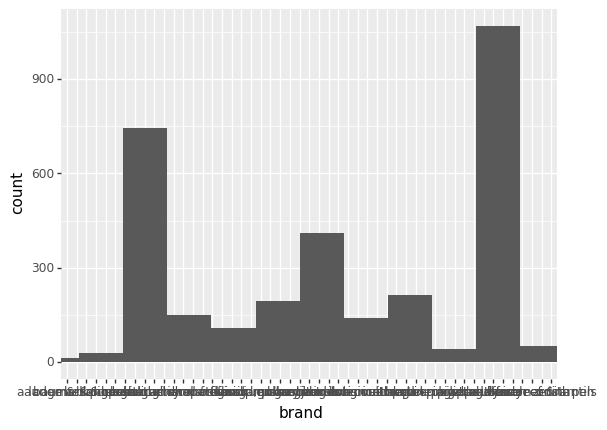

In [18]:
print((
    ggplot(data) +
    geom_histogram(aes('brand'))
    ))

In [19]:
b = pd.DataFrame(data['brand'].value_counts()).sort_values('brand', ascending=False)
b['count'] = b['brand']
b['brand'] = b.index
b = b.reset_index(drop=True)
b.columns = ['brand', 'count']
print(b)

      brand  count
0     rolex    755
1   cartier    475
2    hermes    253
..      ...    ...
48   graham      1
49    other      1
50    prada      1

[51 rows x 2 columns]


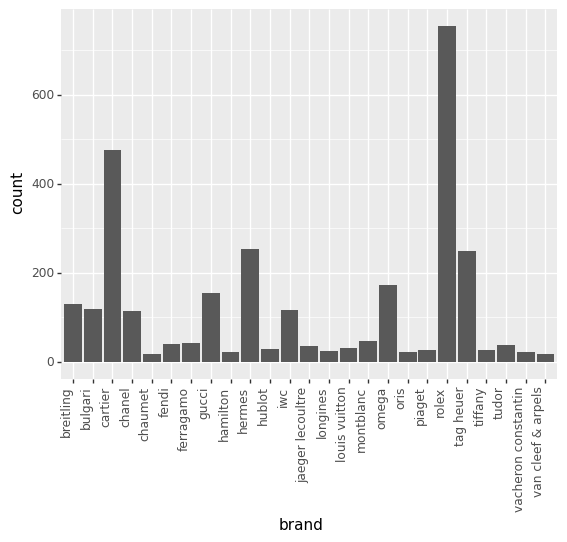

In [39]:
print((
    ggplot(b.iloc[0:25, :]) +
    geom_col(aes(x = b.iloc[0:25, :]['brand'], y = b.iloc[0:25, :]['count'])) +
    theme(axis_text_x=element_text(rotation=90, hjust=1))
))

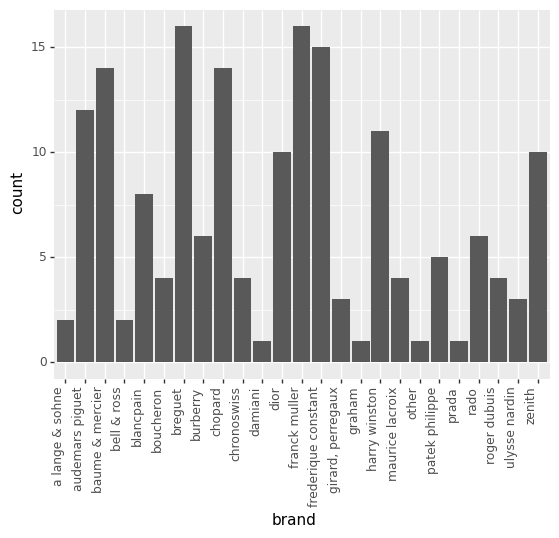

In [40]:
print((
    ggplot(b.iloc[-15:5, :]) +
    geom_col(aes(x = b.iloc[-25:, :]['brand'], y = b.iloc[-25:, :]['count'])) +
    theme(axis_text_x=element_text(rotation=90, hjust=1))
))

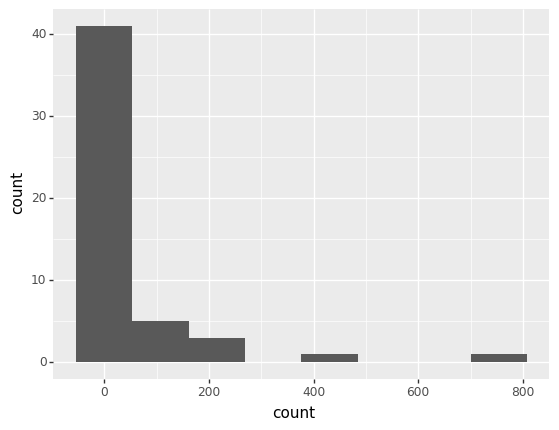

In [41]:
print((
    ggplot(b) +
    geom_histogram(aes('count'), bins = 8)
))

In [23]:
print(b['count'].describe())

count     51.000000
mean      62.117647
std      130.482742
            ...    
50%       18.000000
75%       39.000000
max      755.000000
Name: count, Length: 8, dtype: float64


In [24]:
print(data['brand'].describe())

count      3168
unique       51
top       rolex
freq        755
Name: brand, dtype: object


## 1.4

In [25]:
print(data['watch_color'].nunique())

16


/Users/dreyerswart/Desktop/CODING_PROJECTS/WATCHES/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 16'. Pick better value with 'binwidth'.


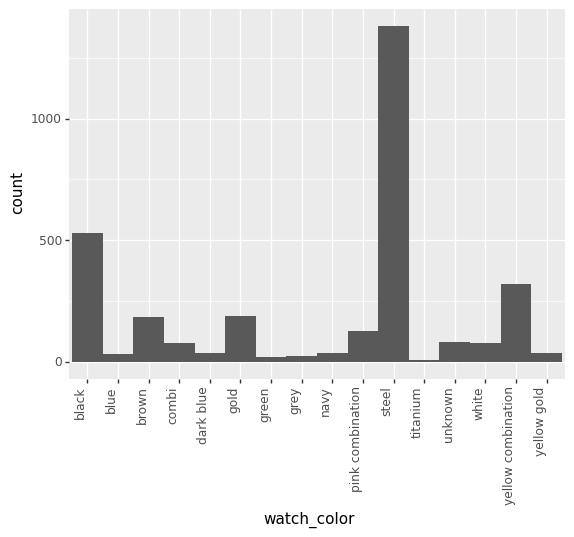

In [26]:
print((
    ggplot(data) +
    geom_histogram(aes('watch_color')) +
    theme(axis_text_x=element_text(rotation=90, hjust=1))
))

In [29]:
print(data['watch_size'].nunique())

13


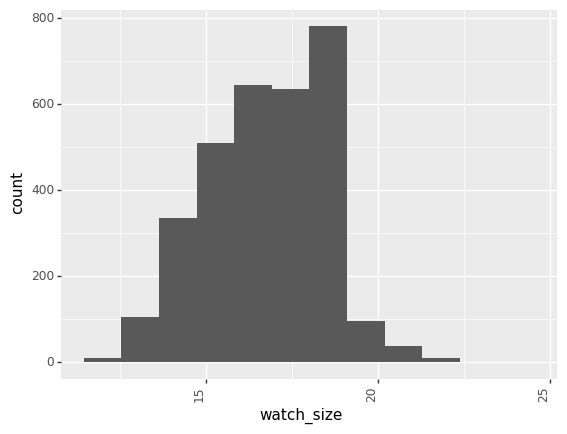

In [33]:
print((
    ggplot(data) +
    geom_histogram(aes('watch_size'), bins = 12) +
    theme(axis_text_x=element_text(rotation=90, hjust=1))
))

In [36]:
pd.set_option('display.max_rows', None)
print(data['watch_size'].describe())
pd.set_option('display.max_rows', 7)

count    3168.000000
mean       16.500316
std         1.806035
min        12.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        24.000000
Name: watch_size, dtype: float64


## 1.5

In [120]:
class eda(object):
    def __init__(self, dataframe, column, is_num=True):
        self.df = dataframe
        self.col = column
        self.n = len(self.df)
        self.is_num = is_num

    def create_cat_df(self):
        _df = pd.DataFrame(self.df[self.col].value_counts()).sort_values(self.col, ascending=False)
        _df['count'] = _df[self.col]
        _df[self.col] = _df.index
        _df = _df.reset_index(drop=True)
        _df.columns = [self.col, 'count']
        return _df

    def plot_cat_col(self, limit = None, is_upper = True):
        _df = self.create_cat_df()
        if not limit and not is_upper:
            plot = ((
                        ggplot(_df) +
                        geom_col(aes(x = _df[self.col], y = _df['count']))  +
                        theme(axis_text_x=element_text(rotation=90, hjust=1))
                    ))


        if limit and is_upper:
            plot = ((
                        ggplot(_df[0:limit]) +
                        geom_col(aes(x = _df.iloc[0:limit][self.col], y = _df.iloc[0:limit]['count']))  +
                        theme(axis_text_x=element_text(rotation=90, hjust=1))
                    ))

        if limit and not is_upper:
            plot = ((
                        ggplot(_df[-limit:]) +
                        geom_col(aes(x = _df.iloc[-limit:][self.col], y = _df.iloc[-limit:]['count']))  +
                        theme(axis_text_x=element_text(rotation=90, hjust=1))
                    ))
        return print(plot)

    def plot_cat_hist(self):
        _df = self.create_cat_df()
        plot = ((
                    ggplot(_df) +
                    geom_histogram(aes(_df['count']), bins = 1 + 3.3*np.log(self.n))
                ))
        return plot

    def plot_num_hist(self):
        _df = self.df
        plot = ((
                    ggplot(_df) +
                    geom_histogram(aes(_df[self.col]), bins = 0.5*(1 + 3.3*np.log(self.n)))
                ))

        return plot

    def plot_hist(self):
        if self.is_num:
            return print(self.plot_num_hist())
        else:
            return print(self.plot_cat_hist())

In [121]:
brand_eda = eda(data, 'brand', is_num = False)

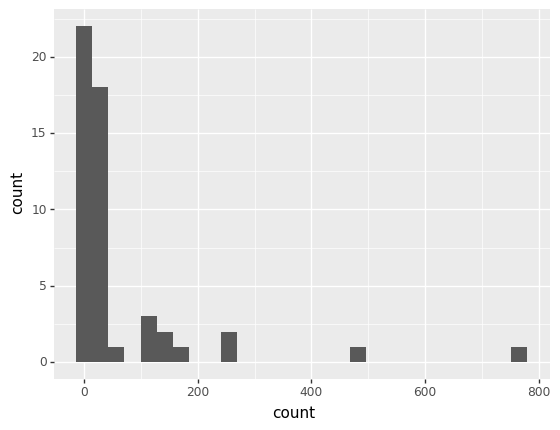

In [122]:
brand_eda.plot_hist()

In [123]:
size_eda = eda(data, 'watch_size')

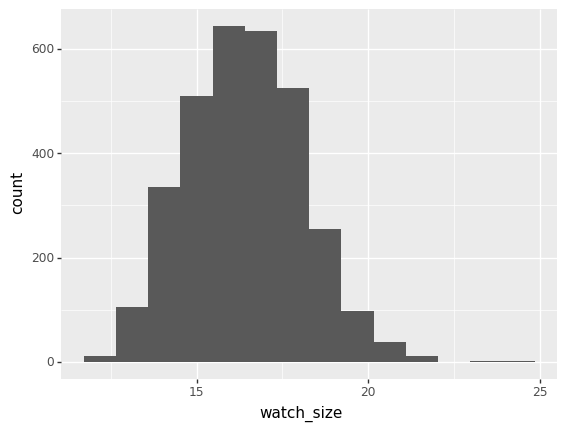

In [124]:
size_eda.plot_hist()

In [27]:
pd.set_option('display.max_rows', None)
display(data.nunique())
pd.set_option('display.max_rows', 7)

watch_name        1111
type_gender          3
brand               51
watch_color         16
watch_size          13
length_of_band      80
price              509
diamonds             2
ref_num           1130
name_length         50
brand_len           16
col_len              8
dtype: int64